# Time series Information

A TS is said to stationary if its statistical properties such as mean, variance, remain constant over time. 

2 reasons that make TS non-stationary:
1. trend - varying mean over time. If we case the that on average, num of passengers growing over time.
2. seasonality - variations at specific time-frames, people have a tendency to buy cars in a particular month because of pay increment or festivals 

In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CSV file is USW00023243.csv which is from: https://www.ncei.noaa.gov/access/search/data-search/normals-hourly-1991-2020?dataTypes=HLY-CLOD-PCTCLR&dataTypes=HLY-CLOD-PCTFEW&dataTypes=HLY-CLOD-PCTSCT&dataTypes=HLY-CLOD-PCTBKN&dataTypes=HLY-CLOD-PCTOVC&dataTypes=HLY-CLDH-NORMAL&dataTypes=HLY-HTDH-NORMAL&dataTypes=HLY-DEWP-NORMAL&dataTypes=HLY-DEWP-10PCTL&dataTypes=HLY-DEWP-90PCTL&dataTypes=HLY-HIDX-NORMAL&bbox=37.975,-122.618,37.579,-122.222&startDate=2021-10-02T00:00:00&endDate=2021-10-02T00:00:59

January 1st, 24 hours

Information about flags page 2: https://www.ncei.noaa.gov/data/normals-hourly/1991-2020/doc/Normals_HLY_Documentation_1991-2020.pdf

In [56]:
#January 1st, 24 hours 
df = pd.read_csv("/Users/yukahatori/A_Fairness/USW00023234_simple.csv", nrows = 24)

#drop columns we don't need
df.drop('STATION', axis=1, inplace=True)
df.drop('NAME', axis=1, inplace=True)
df.drop('LATITUDE', axis=1, inplace=True)
df.drop('LONGITUDE', axis=1, inplace=True)
df.drop('ELEVATION', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('hour', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)

#checks the flags and removes any rows corresponding with 'M' which means the data is missing
measurementFlags = list(df.filter(regex='meas'))
for flag in measurementFlags:
    df = df[~df[flag].str.contains('M')]

completenessFlags = list(df.filter(regex='meas'))
for flag in completenessFlags:
    df = df[~df[flag].str.contains('-9999')]
        
#get rid of all measurement and completeness flags
df = df[df.columns.drop(list(df.filter(regex='meas')))]
df = df[df.columns.drop(list(df.filter(regex='comp')))]

#rename columns
# df.columns = ['DATE', 'HLY_TEMP_NORMAL', 'years_HLY_TEMP_NORMAL', 'HLY_TEMP_10PCTL',
#        'years_HLY_TEMP_10PCTL', 'HLY_TEMP_90PCTL', 'years_HLY_TEMP_90PCTL',
#        'HLY_DEWP_NORMAL', 'years_HLY_DEWP_NORMAL', 'HLY_DEWP_10PCTL',
#        'years_HLY_DEWPv10PCTL', 'HLY_DEWP_90PCTL', 'years_HLY_DEWP_90PCTL',
#        'HLY_PRES_NORMAL', 'years_HLY_PRES_NORMAL', 'HLY_PRES_10PCTL',
#        'years_HLY_PRES_10PCTL', 'HLY_PRES_90PCTL', 'years_HLY_PRES_90PCTL',
#        'HLY_CLDH_NORMAL', 'years_HLY_CLDH_NORMAL', 'HLY_HTDH_NORMAL',
#        'years_HLY_HTDH_NORMAL', 'HLY_CLOD_PCTCLR', 'years_HLY_CLOD_PCTCLR',
#        'HLY_CLOD_PCTFEW', 'years_HLY_CLOD_PCTFEW', 'HLY_CLOD_PCTSCT',
#        'years_HLY_CLOD_PCTSCT', 'HLY_CLOD_PCTBKN', 'years_HLY_CLOD_PCTBKN',
#        'HLY_CLOD_PCTOVC', 'years_HLY_CLOD_PCTOVC', 'HLY_HIDX_NORMAL',
#        'years_HLY_HIDX_NORMAL', 'HLY_WCHL_NORMAL', 'years_HLY_WCHL_NORMAL',
#        'HLY_WIND_AVGSPD', 'years_HLY_WIND_AVGSPD', 'HLY_WIND_PCTCLM',
#        'years_HLY_WIND_PCTCLM', 'HLY_WIND_VCTDIR', 'years_HLY_WIND_VCTDIR',
#        'HLY_WIND_VCTSPD', 'years_HLY_WIND_VCTSPD', 'HLY_WIND_1STDIR',
#        'years_HLY-WIND-1STDIR', 'HLY_WIND_1STPCT', 'years_HLY_WIND_1STPCT',
#        'HLY_WIND_2NDDIR', 'years_HLY_WIND_2NDDIR', 'HLY_WIND_2NDPCT',
#        'years_HLY_WIND_2NDPCT']

df.columns = ['date', 'HLY_TEMP_NORMAL', 'years_HLY_TEMP_NORMAL', 'HLY_TEMP_10PCTL',
       'years_HLY_TEMP_10PCTL', 'HLY_TEMP_90PCTL', 'years_HLY_TEMP_90PCTL',
       'HLY_DEWP_NORMAL', 'years_HLY_DEWP_NORMAL', 'HLY_DEWP_10PCTL',
       'years_HLY_DEWPv10PCTL', 'HLY_DEWP_90PCTL', 'years_HLY_DEWP_90PCTL',
       'HLY_PRES_NORMAL', 'years_HLY_PRES_NORMAL', 'HLY_PRES_10PCTL',
       'years_HLY_PRES_10PCTL', 'HLY_PRES_90PCTL', 'years_HLY_PRES_90PCTL',
       'HLY_CLDH_NORMAL', 'years_HLY_CLDH_NORMAL', 'HLY_HTDH_NORMAL',
       'years_HLY_HTDH_NORMAL', 'HLY_CLOD_PCTCLR', 'years_HLY_CLOD_PCTCLR',
       'HLY_CLOD_PCTFEW', 'years_HLY_CLOD_PCTFEW', 'HLY_CLOD_PCTSCT',
       'years_HLY_CLOD_PCTSCT', 'HLY_CLOD_PCTBKN', 'years_HLY_CLOD_PCTBKN',
       'HLY_CLOD_PCTOVC', 'years_HLY_CLOD_PCTOVC', 'HLY_HIDX_NORMAL',
       'years_HLY_HIDX_NORMAL', 'HLY_WCHL_NORMAL', 'years_HLY_WCHL_NORMAL',
       'HLY_WIND_AVGSPD', 'years_HLY_WIND_AVGSPD', 'HLY_WIND_PCTCLM',
       'years_HLY_WIND_PCTCLM', 'HLY_WIND_VCTDIR', 'years_HLY_WIND_VCTDIR',
       'HLY_WIND_VCTSPD', 'years_HLY_WIND_VCTSPD', 'HLY_WIND_1STDIR',
       'years_HLY-WIND-1STDIR', 'HLY_WIND_1STPCT', 'years_HLY_WIND_1STPCT',
       'HLY_WIND_2NDDIR', 'years_HLY_WIND_2NDDIR', 'HLY_WIND_2NDPCT',
       'years_HLY_WIND_2NDPCT']
#DROPPING COLUMNS FOR TESTING
df = df.drop(columns=['years_HLY_TEMP_NORMAL', 'HLY_TEMP_10PCTL',
       'years_HLY_TEMP_10PCTL', 'HLY_TEMP_90PCTL', 'years_HLY_TEMP_90PCTL',
       'HLY_DEWP_NORMAL', 'years_HLY_DEWP_NORMAL', 'HLY_DEWP_10PCTL',
       'years_HLY_DEWPv10PCTL', 'HLY_DEWP_90PCTL', 'years_HLY_DEWP_90PCTL',
       'HLY_PRES_NORMAL', 'years_HLY_PRES_NORMAL', 'HLY_PRES_10PCTL',
       'years_HLY_PRES_10PCTL', 'HLY_PRES_90PCTL', 'years_HLY_PRES_90PCTL',
       'HLY_CLDH_NORMAL', 'years_HLY_CLDH_NORMAL', 'HLY_HTDH_NORMAL',
       'years_HLY_HTDH_NORMAL', 'HLY_CLOD_PCTCLR', 'years_HLY_CLOD_PCTCLR',
       'HLY_CLOD_PCTFEW', 'years_HLY_CLOD_PCTFEW', 'HLY_CLOD_PCTSCT',
       'years_HLY_CLOD_PCTSCT', 'HLY_CLOD_PCTBKN', 'years_HLY_CLOD_PCTBKN',
       'HLY_CLOD_PCTOVC', 'years_HLY_CLOD_PCTOVC', 'HLY_HIDX_NORMAL',
       'years_HLY_HIDX_NORMAL', 'HLY_WCHL_NORMAL', 'years_HLY_WCHL_NORMAL',
       'HLY_WIND_AVGSPD', 'years_HLY_WIND_AVGSPD', 'HLY_WIND_PCTCLM',
       'years_HLY_WIND_PCTCLM', 'HLY_WIND_VCTDIR', 'years_HLY_WIND_VCTDIR',
       'HLY_WIND_VCTSPD', 'years_HLY_WIND_VCTSPD', 'HLY_WIND_1STDIR',
       'years_HLY-WIND-1STDIR', 'HLY_WIND_1STPCT', 'years_HLY_WIND_1STPCT',
       'HLY_WIND_2NDDIR', 'years_HLY_WIND_2NDDIR', 'HLY_WIND_2NDPCT',
       'years_HLY_WIND_2NDPCT'])
print("-------------------------------NEW COLUMNS-----------------------------")
print(df)
print('---------------------------------DESCRIBE------------------------------')
#describe
print(df.describe())


-------------------------------NEW COLUMNS-----------------------------
              date  HLY_TEMP_NORMAL
1   01-01T01:00:00             48.5
2   01-01T02:00:00             47.6
3   01-01T03:00:00             47.2
4   01-01T04:00:00             46.8
5   01-01T05:00:00             46.6
6   01-01T06:00:00             46.6
7   01-01T07:00:00             46.8
8   01-01T08:00:00             47.2
9   01-01T09:00:00             48.9
10  01-01T10:00:00             50.5
11  01-01T11:00:00             51.5
12  01-01T12:00:00             52.4
13  01-01T13:00:00             53.2
14  01-01T14:00:00             53.8
15  01-01T15:00:00             54.1
16  01-01T16:00:00             53.9
17  01-01T17:00:00             53.0
18  01-01T18:00:00             52.3
---------------------------------DESCRIBE------------------------------
       HLY_TEMP_NORMAL
count        18.000000
mean         50.050000
std           2.947631
min          46.600000
25%          47.200000
50%          49.700000
75%        

# Recode data

Turn date column into a DateTime data type and make it the index of the DataFrame.


In [57]:
df.date = pd.to_datetime(df.date, format = "%m-%dT%H:%M:%S")
df.date = df.date.apply(lambda x: x.hour)
df.set_index('date', inplace = True)

print(df.head())

      HLY_TEMP_NORMAL
date                 
1                48.5
2                47.6
3                47.2
4                46.8
5                46.6


# Exploratory data analysis

Text(0.5, 0, 'Hour')

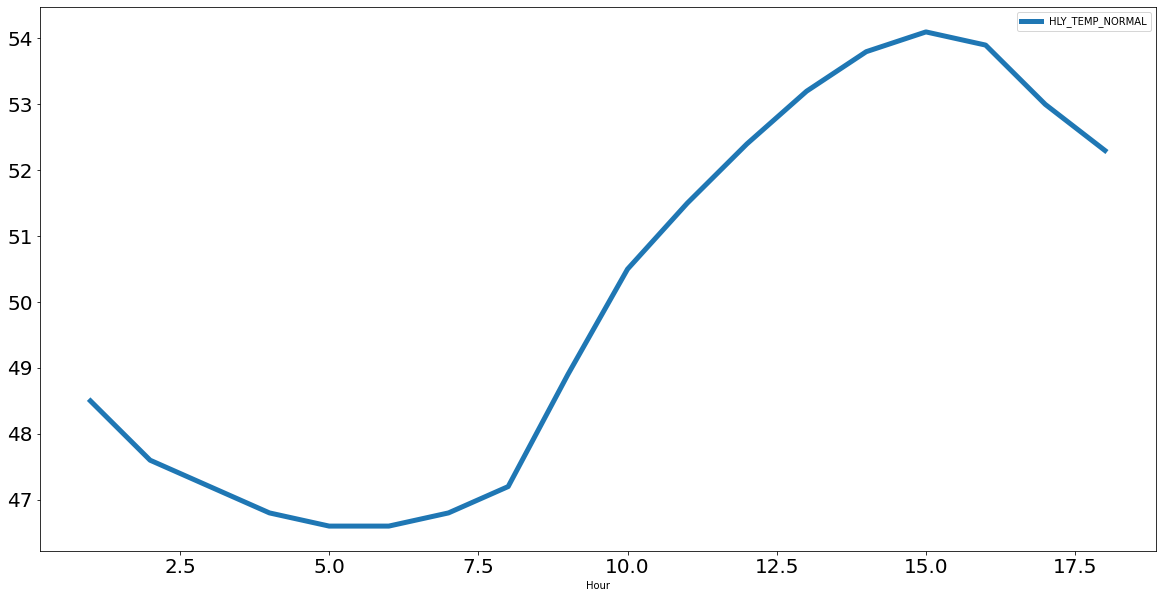

In [62]:

df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Hour')


# Resampling, smoothing, windowing, rolling average: trends

Rolling average, for each time point, takes the average of the points on either side of it. Note that the number of points is specified by a window size.

Remove seasonality with pandas Series.

I don't think I need to do resampling. Resampling would be to change the time interval to something else, but I don't need to. I have access to a year's worth of temp data.

In [75]:
# columns = df.columns
# print(columns)

# hly = df['HLY_TEMP_NORMAL']
# print(hly)
# hly_resamp_hr = hly.resample('A').mean()
# hly_roll_yr = hly.rolling(12).mean()


# hly_temp_normal_resamp_hr = hly.resample('H').mean()
# df['HLY_TEMP_NORMAL'] = pd.to_datetime(df['HLY_TEMP_NORMAL'])
# weekly_summary = df.HLY_TEMP_NORMAL.resample('W', on='HLY_TEMP_NORMAL').sum()
# df = df.set_index('HLY-TEMP-NORMAL').resample('H').size()
# hly = df['HLY-TEMP-NORMAL']
# hly_temp_normal_resamp_hr = hly.resample('H').mean()
# hly_temp_normal_roll_hr = df['HLY-TEMP-NORMAL'].rolling(12).mean()

# ax = hly.plot(alpha=0.5, style='-') # store axis (ax) for latter plots
# hly_temp_normal_resamp_yr.plot(style=':', label='Resample at year frequency', ax=ax)
# hly_temp_normal_roll_yr.plot(style='--', label='Rolling average (smooth), window size=12', ax=ax)
# ax.legend()


Rolling average (smoothing) with Numpy

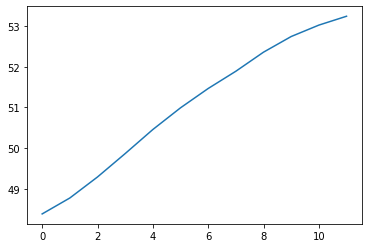

In [79]:
x = np.asarray(df['HLY_TEMP_NORMAL'])
win = 12
win_half = int(win/2)


hly_smooth = np.array([x[(idx-win_half):(idx+win_half)].mean() for idx in np.arange(win_half, len(x))])
plt.plot(hly_smooth)

# Autocorrelation

A time series is periodic if it repeats itself at equallly spaced intervals, say, every 12 months. Autocorrelation function (ACF): measure of the correlation between the TS with a lagged version of itself.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

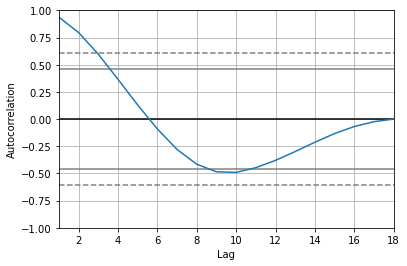

In [80]:
# from pandas.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot

x = df["HLY_TEMP_NORMAL"].astype(float)
autocorrelation_plot(x)

Text(0.5, 1.0, 'Autocorrelation Function')

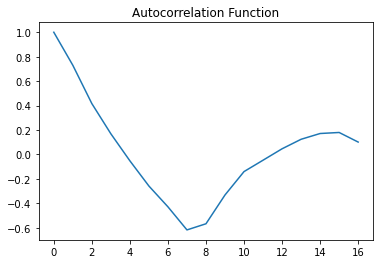

In [81]:
from statsmodels.tsa.stattools import acf

x_diff = x.diff().dropna() # first item is NA
lag_acf = acf(x_diff, nlags=36, fft=True)
plt.plot(lag_acf)
plt.title('Autocorrelation Function')

# Time series forecasting with Python using Autoregressive Moving Average (ARMA) models

Used to forecast a time series. These models combine autoregressive and moving average models. In moving average models, we assume that a variable is the sum of the mean of the time series and a linear combination of noise components.

The autoreggressive and moving average models can have different orders. 

In [82]:
from statsmodels.tsa.stattools import acf, pacf

x = df["HLY_TEMP_NORMAL"].astype(float)

x_diff = x.diff().dropna() # first item is NA
# ACF and PACF plots:

lag_acf = acf(x_diff, nlags=20, fft=True)
lag_pacf = pacf(x_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function  (q=1)')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function (p=1)')
plt.tight_layout()

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 8.